# Step 1: Load the Libraries

Load Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


Load Data

In [3]:
 df=pd.read_excel(r'/content/Updated_Appliance_Impacts.xlsx')
df.head()

,Customer ID,Country,Ownership Tenure,Appliance Type,Purchase Year,Interview Year,Gender,Age,Household Size,Rural/Urban Residence,...,Discontinued Usage,Reason for Discontinuation,Customer Suggestions,Appliance Emission Rate (kg CO₂/year),Years of Use,Total CO₂ Emissions (kg CO₂),Energy Source,Efficiency Rating,Usage Frequency (hours/day),Energy Consumption (kWh/year)
0,CUST1,Zambia,2-3 years,Refrigerator,2018,2022,Male,55,6,Urban,...,No,Repossession,Improved payment terms,150,4,600,Grid Electricity,2,5.253294,575.235655
1,CUST2,Tanzania,2-3 years,Solar Water Pump,2018,2021,Female,25,6,Rural,...,Yes,Appliance failure,Better customer service,0,3,0,Solar,4,4.038680,0.000000
2,CUST3,Kenya,2-3 years,Solar Water Pump,2020,2021,Male,51,4,Urban,...,No,Business worsened,Improved payment terms,0,1,0,Solar,1,5.400867,0.000000
3,CUST4,Rwanda,3-4 years,Solar Water Pump,2019,2019,Female,58,3,Urban,...,Yes,Appliance failure,Product improvements,0,0,0,Solar,3,7.091396,0.000000
4,CUST5,Kenya,1-2 years,TV,2016,2018,Female,67,5,Rural,...,Yes,Appliance failure,Improved payment terms,50,2,100,Grid Electricity,5,2.674443,97.617186


In [4]:
df.shape

(2000, 32)

In [5]:
df.columns

Index(['Customer ID', 'Country', 'Ownership Tenure', 'Appliance Type',
       'Purchase Year', 'Interview Year', 'Gender', 'Age', 'Household Size',
       'Rural/Urban Residence', 'Educational Level',
       'Net Promoter Score (NPS)', 'Quality of Life Improvement',
       'Income Increase', 'Business Evolution', 'Dietary Changes',
       'Increased Agricultural Yield', 'Increased Water Usage',
       'Access to Civic & Health Information',
       'Working Condition of Appliance', 'Challenges Reported',
       'Challenge Type', 'Discontinued Usage', 'Reason for Discontinuation',
       'Customer Suggestions', 'Appliance Emission Rate (kg CO₂/year)',
       'Years of Use', 'Total CO₂ Emissions (kg CO₂)', 'Energy Source',
       'Efficiency Rating', 'Usage Frequency (hours/day)',
       'Energy Consumption (kWh/year)'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 32 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Customer ID                            2000 non-null   object 
 1   Country                                2000 non-null   object 
 2   Ownership Tenure                       2000 non-null   object 
 3   Appliance Type                         2000 non-null   object 
 4   Purchase Year                          2000 non-null   int64  
 5   Interview Year                         2000 non-null   int64  
 6   Gender                                 2000 non-null   object 
 7   Age                                    2000 non-null   int64  
 8   Household Size                         2000 non-null   int64  
 9   Rural/Urban Residence                  2000 non-null   object 
 10  Educational Level                      2000 non-null   object 
 11  Net 

In [7]:
df.isnull().sum()

,0
Customer ID,0
Country,0
Ownership Tenure,0
Appliance Type,0
Purchase Year,0
Interview Year,0
Gender,0
Age,0
Household Size,0
Rural/Urban Residence,0


Count numeric and Categorical Columns

In [8]:
num_cols = df.select_dtypes(include=['number']).shape[1]
num_cols

12

In [9]:
cat_cols=df.select_dtypes(include=['object']).shape[1]
cat_cols

20

#  Understanding the Dataset
The dataset contains 2000 rows and 32 columns.

Categorical columns (20 total): Includes 'Country', 'Appliance Type', 'Ownership Tenure', 'Energy Source', 'Gender', etc.

Numerical columns (12 total): Includes 'Appliance Emission Rate (kg CO₂/year)', 'Total CO₂ Emissions (kg CO₂)', 'Usage Frequency (hours/day)', etc.

Some columns like 'Dietary Changes', 'Increased Agricultural Yield', 'Access to Civic & Health Information' have missing values.

The target variable for clustering is likely Appliance Emission Rate (kg CO₂/year)

# Step 2: Data Cleaning
We'll:

Handle missing values.

Convert categorical data into numerical form.

Normalize numerical values.

In [10]:
#handling Missing Values
for col in df.select_dtypes(include=['object']).columns:
    df[col].fillna("Unknown", inplace=True)

for col in df.select_dtypes(include=['int64', 'float64']).columns:
    df[col].fillna(df[col].median(), inplace=True)

<ipython-input-10-4306d861d067>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna("Unknown", inplace=True)
<ipython-input-10-4306d861d067>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.met

In [11]:
df.isnull().sum()

,0
Customer ID,0
Country,0
Ownership Tenure,0
Appliance Type,0
Purchase Year,0
Interview Year,0
Gender,0
Age,0
Household Size,0
Rural/Urban Residence,0


In [12]:
df.describe()

,Purchase Year,Interview Year,Age,Household Size,Net Promoter Score (NPS),Quality of Life Improvement,Appliance Emission Rate (kg CO₂/year),Years of Use,Total CO₂ Emissions (kg CO₂),Efficiency Rating,Usage Frequency (hours/day),Energy Consumption (kWh/year)
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,2018.431000,2019.940500,43.401000,5.536000,25.058000,50.225000,65.475000,1.509500,98.950000,3.046500,4.476693,214.200942
std,1.711053,1.409593,15.275761,2.877472,43.010575,28.813026,63.413603,2.203256,221.632484,1.435747,2.028376,245.141729
min,2016.000000,2018.000000,18.000000,1.000000,-50.000000,0.000000,0.000000,-3.000000,-450.000000,1.000000,1.002423,0.000000
25%,2017.000000,2019.000000,30.000000,3.000000,-12.000000,25.000000,0.000000,0.000000,0.000000,2.000000,2.724219,0.000000
50%,2018.000000,2020.000000,43.000000,5.000000,24.000000,50.000000,50.000000,2.000000,0.000000,3.000000,4.485978,138.682291
75%,2020.000000,2021.000000,57.000000,8.000000,62.000000,76.000000,150.000000,3.000000,150.000000,4.000000,6.236485,322.805333
max,2021.000000,2022.000000,70.000000,10.000000,100.000000,100.000000,150.000000,6.000000,900.000000,5.000000,7.999267,875.028177


In [13]:
df.head()

,Customer ID,Country,Ownership Tenure,Appliance Type,Purchase Year,Interview Year,Gender,Age,Household Size,Rural/Urban Residence,...,Discontinued Usage,Reason for Discontinuation,Customer Suggestions,Appliance Emission Rate (kg CO₂/year),Years of Use,Total CO₂ Emissions (kg CO₂),Energy Source,Efficiency Rating,Usage Frequency (hours/day),Energy Consumption (kWh/year)
0,CUST1,Zambia,2-3 years,Refrigerator,2018,2022,Male,55,6,Urban,...,No,Repossession,Improved payment terms,150,4,600,Grid Electricity,2,5.253294,575.235655
1,CUST2,Tanzania,2-3 years,Solar Water Pump,2018,2021,Female,25,6,Rural,...,Yes,Appliance failure,Better customer service,0,3,0,Solar,4,4.038680,0.000000
2,CUST3,Kenya,2-3 years,Solar Water Pump,2020,2021,Male,51,4,Urban,...,No,Business worsened,Improved payment terms,0,1,0,Solar,1,5.400867,0.000000
3,CUST4,Rwanda,3-4 years,Solar Water Pump,2019,2019,Female,58,3,Urban,...,Yes,Appliance failure,Product improvements,0,0,0,Solar,3,7.091396,0.000000
4,CUST5,Kenya,1-2 years,TV,2016,2018,Female,67,5,Rural,...,Yes,Appliance failure,Improved payment terms,50,2,100,Grid Electricity,5,2.674443,97.617186


# Encode Categorical Columns

In [14]:
label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [15]:
df.head()

,Customer ID,Country,Ownership Tenure,Appliance Type,Purchase Year,Interview Year,Gender,Age,Household Size,Rural/Urban Residence,...,Discontinued Usage,Reason for Discontinuation,Customer Suggestions,Appliance Emission Rate (kg CO₂/year),Years of Use,Total CO₂ Emissions (kg CO₂),Energy Source,Efficiency Rating,Usage Frequency (hours/day),Energy Consumption (kWh/year)
0,0,5,1,0,2018,2022,1,55,6,1,...,0,2,1,150,4,600,0,2,5.253294,575.235655
1,1111,3,1,1,2018,2021,0,25,6,0,...,1,0,0,0,3,0,1,4,4.038680,0.000000
2,1223,0,1,1,2020,2021,1,51,4,1,...,0,1,1,0,1,0,1,1,5.400867,0.000000
3,1334,1,2,1,2019,2019,0,58,3,1,...,1,0,2,0,0,0,1,3,7.091396,0.000000
4,1445,0,0,2,2016,2018,0,67,5,0,...,1,0,1,50,2,100,0,5,2.674443,97.617186


# Normalize Numerical Columns

In [16]:
scaler = StandardScaler()
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Selecting Features for Clustering

In [17]:
features = ['Country', 'Appliance Emission Rate (kg CO₂/year)',
            'Total CO₂ Emissions (kg CO₂)', 'Energy Consumption (kWh/year)']
X = df[features]

# Find Optimal k Using Elbow Method
Clustering Using K-Means
Now that the dataset is cleaned and preprocessed, we will:

Determine the optimal number of clusters using the Elbow Method.

Apply K-Means Clustering to group appliances by emission rates per country.

Visualize the clusters.

# Let's proceed with finding the optimal number of clusters

In [18]:
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)


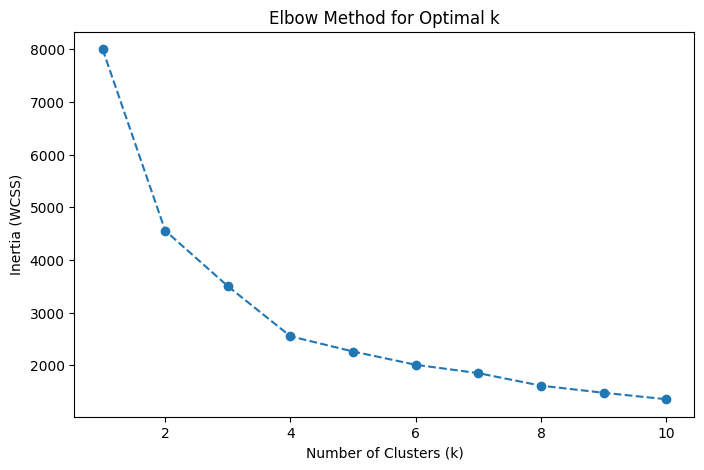

In [19]:
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o', linestyle='--')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia (WCSS)")
plt.title("Elbow Method for Optimal k")
plt.show()

The Elbow Method graph suggests the optimal number of clusters is likely around 3 or 4, where the inertia (within-cluster sum of squares) starts to level off. I'll now apply K-Means clustering with
𝑘
=
4
k=4 and visualize the clusters.

# Apply K-Means Clustering with k=4

In [20]:
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
df["Cluster"] = kmeans.fit_predict(X)

# PCA for Visualization

In [21]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
df["PCA1"] = X_pca[:, 0]
df["PCA2"] = X_pca[:, 1]

# Scatter Plot of Clusters

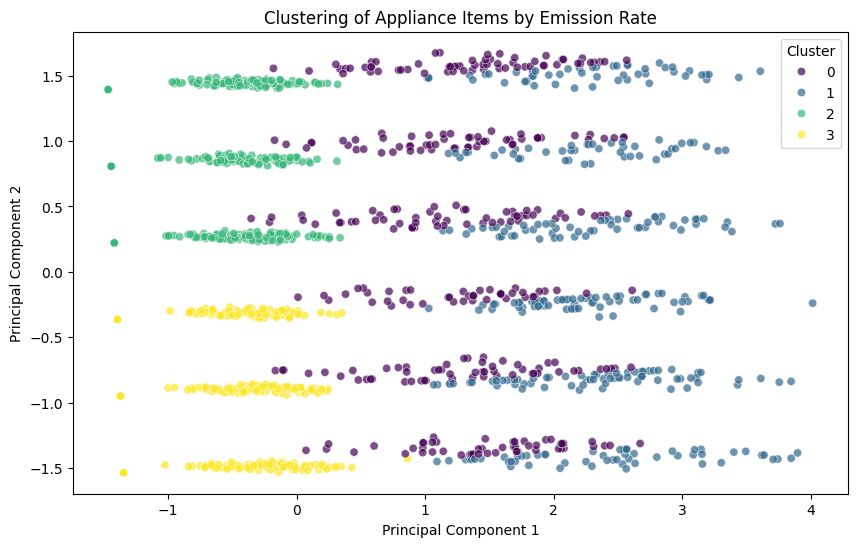

In [22]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="PCA1", y="PCA2", hue="Cluster", palette="viridis", alpha=0.7)
plt.title("Clustering of Appliance Items by Emission Rate")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster")
plt.show()

The clustering visualization (using PCA) shows how appliance items are grouped based on their emission rates. Different clusters highlight appliances with similar emission profiles across countries.

# PCA on Full Dataset

In [23]:
pca_full = PCA(n_components=5)  # Keeping top 5 components
X_pca_full = pca_full.fit_transform(df.drop(columns=["Cluster", "PCA1", "PCA2"]))

# Variance Explained by Each Component

In [26]:
explained_variance = pca_full.explained_variance_ratio_

# Plot Variance Explained

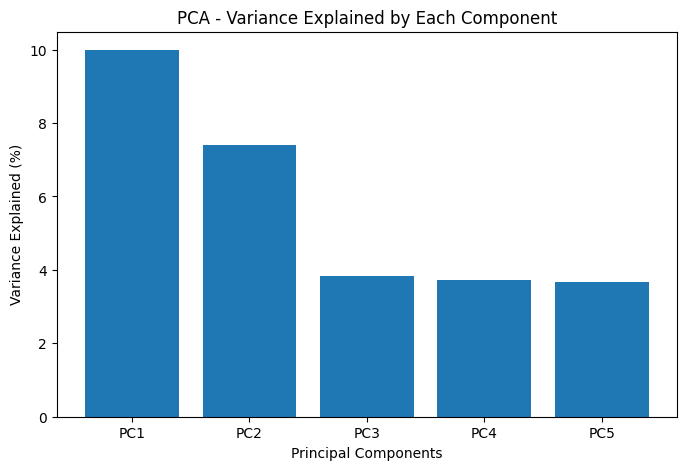

In [27]:
plt.figure(figsize=(8, 5))
plt.bar(range(1, 6), explained_variance * 100, tick_label=[f'PC{i}' for i in range(1, 6)])
plt.ylabel("Variance Explained (%)")
plt.xlabel("Principal Components")
plt.title("PCA - Variance Explained by Each Component")
plt.show()

Now, let's move to Principal Component Analysis (PCA) to understand which features contribute the most variance in the dataset.

The first two principal components capture most of the variance in the dataset, meaning they contain the most important information for clustering.